## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [5]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige', 'satjob','sex', 'race','satfin'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

**Description of the Selected Data**

---



I chose six key variables that provide insight into employment status, occupational prestige, job and financial satisfaction, and demographic factors. These variables allow for an analysis of how job characteristics and demographics influence overall job satisfaction and financial well-being.

The first set of variables focuses on work and job-related perceptions. 'wrkstat' represents the respondent's labor force status, categorizing individuals as full-time workers, part-time workers, students, homemakers, retirees, or unemployed. Understanding labor force participation provides context for how different employment statuses relate to overall well-being. 'prestige' measures the occupational prestige score, a numerical representation of how prestigious an individual’s job is perceived to be. This variable is useful for studying whether job prestige is linked to job satisfaction and financial security. 'satjob' captures job satisfaction, providing insight into how individuals feel about their work and whether certain professions lead to higher levels of contentment.

In addition to job-related variables, the dataset includes demographic and financial factors. 'sex' identifies respondents as male or female, allowing for gender-based comparisons in job satisfaction and career prestige. 'race' categorizes respondents into racial groups (e.g., White, Black, or Other), providing a way to examine potential racial disparities in job prestige and satisfaction. Lastly, 'satfin' measures satisfaction with one’s financial situation, which can be analyzed in relation to occupational prestige and job satisfaction to understand how different work experiences translate into perceived financial stability.

One key research question is: Do individuals with high occupational prestige report higher job satisfaction and financial satisfaction?






In [12]:
#Clean the data for EDA
import pandas as pd

# Load the dataset
df = pd.read_csv("selected_gss_data.csv")

# Display unique values for each variable
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values for {col}:\n{unique_values}\n")

print(df.isnull().sum())  # Count missing values in each column

# Convert to lowercase
df['wrkstat'] = df['wrkstat'].str.lower()
df['satjob'] = df['satjob'].str.lower()
df['satfin'] = df['satfin'].str.lower()
df['sex'] = df['sex'].str.lower()
df['race'] = df['race'].str.lower()

# Replace long text responses with shorter labels
df['wrkstat'].replace({
    'working full time': 'full-time',
    'working part time': 'part-time',
    'unemployed, laid off, looking for work': 'unemployed',
    'with a job, but not at work because of temporary illness, vacation, strike': 'not at work',
    'keeping house': 'homemaker',
    'in school': 'student'
}, inplace=True)

df['satjob'].replace({
    'very satisfied': 'very_satisfied',
    'moderately satisfied': 'moderately_satisfied',
    'a little dissatisfied': 'slightly_dissatisfied',
    'very dissatisfied': 'very_dissatisfied'
}, inplace=True)

df['satfin'].replace({
    'not satisfied at all': 'not_satisfied',
    'more or less satisfied': 'moderately_satisfied',
    'pretty well satisfied': 'satisfied'
}, inplace=True)

# Convert categorical variables to type "category"
categorical_cols = ['wrkstat', 'satjob', 'sex', 'race', 'satfin']
df[categorical_cols] = df[categorical_cols].astype('category')

df['prestige'] = pd.to_numeric(df['prestige'], errors='coerce')  # Ensure numeric type
df['prestige'].fillna(df['prestige'].median(), inplace=True)  # Fill missing with median

df = df.dropna()  # Removes all rows with any NaN values



Unique values for wrkstat:
['working full time' 'retired' 'working part time' 'keeping house'
 'in school' 'unemployed, laid off, looking for work'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'other' nan]

Unique values for prestige:
[50. 45. 44. 57. 40. 49. 41. 36. 26. 18. 12. 32. 63. nan 51. 46. 60. 19.
 34. 22. 29. 62. 47. 48. 17. 33. 38. 27. 14. 25. 20. 78. 35. 67. 56. 69.
 16. 39. 23. 43. 31. 42. 61. 72. 37. 74. 54. 30. 28. 52. 15. 68. 24. 55.
 76. 58. 71. 82. 21. 53. 65. 66. 70.]

Unique values for satjob:
['a little dissatisfied' nan 'moderately satisfied' 'very satisfied'
 'very dissatisfied']

Unique values for sex:
['female' 'male' nan]

Unique values for race:
['white' 'black' 'other' nan]

Unique values for satfin:
['not satisfied at all' 'more or less satisfied' 'pretty well satisfied'
 nan]

wrkstat        36
prestige    48123
satjob      20503
sex           112
race          107
satfin       4668
dtype: int64
     wrkstat  prestige     

<ipython-input-12-3204b3f20745>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wrkstat'].replace({
<ipython-input-12-3204b3f20745>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: valu

In [13]:
print(df.head())  # Preview cleaned dataset

     wrkstat  prestige                 satjob     sex   race  \
0  full-time      50.0  slightly_dissatisfied  female  white   
2  part-time      44.0   moderately_satisfied  female  white   
3  full-time      57.0         very_satisfied  female  white   
5  full-time      49.0   moderately_satisfied    male  white   
6  full-time      41.0         very_satisfied    male  white   

                 satfin  
0         not_satisfied  
2             satisfied  
3         not_satisfied  
5  moderately_satisfied  
6  moderately_satisfied  


In [19]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary Statistics for the Numerical Variable (Prestige)
print("Summary Statistics for Prestige:\n", df['prestige'].describe())

Summary Statistics for Prestige:
 count    51187.000000
mean        39.257272
std          8.667904
min         12.000000
25%         39.000000
50%         39.000000
75%         39.000000
max         82.000000
Name: prestige, dtype: float64


In [20]:
# 2. Value Counts for Categorical Variables
print("\nCategorical Variable Counts:")
for col in categorical_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")


Categorical Variable Counts:

wrkstat:
wrkstat
full-time      32400
homemaker       8497
part-time       6786
unemployed      2132
not at work     1357
retired            6
student            6
other              3
Name: count, dtype: int64

satjob:
satjob
very_satisfied           24363
moderately_satisfied     19606
slightly_dissatisfied     5085
very_dissatisfied         2133
Name: count, dtype: int64

sex:
sex
female    28747
male      22440
Name: count, dtype: int64

race:
race
white    40791
black     7167
other     3229
Name: count, dtype: int64

satfin:
satfin
moderately_satisfied    23182
not_satisfied           14076
satisfied               13929
Name: count, dtype: int64


To better understand the dataset, I first computed **summary statistics** for the only numerical variable, **`prestige`**, which measures occupational prestige. This included key metrics such as the **mean, median, standard deviation, and range** to assess the distribution of prestige scores. Since the remaining variables are categorical, I generated **value counts** for each category in **`wrkstat`**, **`satjob`**, **`sex`**, **`race`**, and **`satfin`** to explore their frequency distributions. This approach ensures a clear overview of the data, highlighting **patterns in job satisfaction, work status, and financial well-being** before proceeding with further analysis.

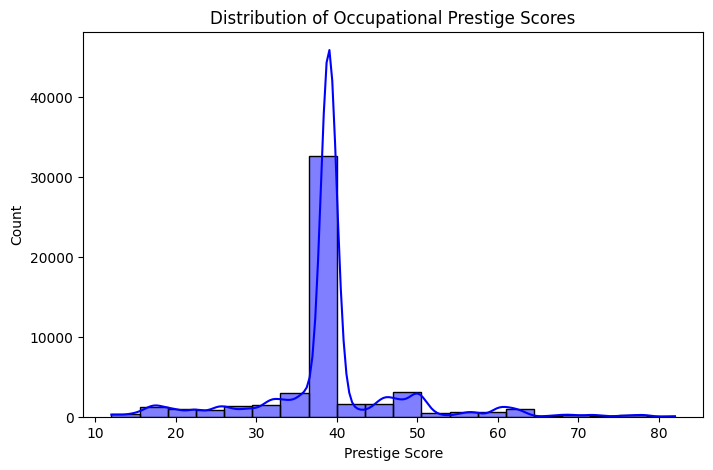

In [29]:
# 1. Distribution of Occupational Prestige Scores
plt.figure(figsize=(8,5))
sns.histplot(df['prestige'], bins=20, kde=True,color='blue')
plt.title("Distribution of Occupational Prestige Scores")
plt.xlabel("Prestige Score")
plt.ylabel("Count")
plt.show()

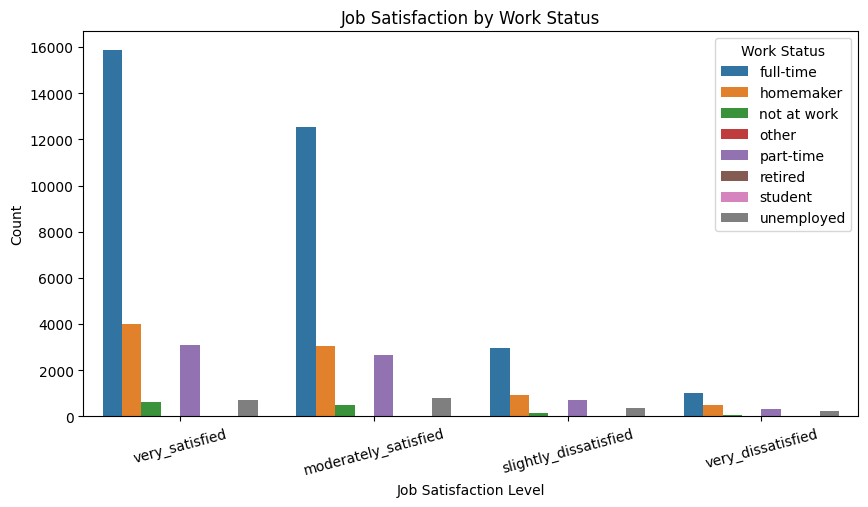

In [24]:
# 2. Job Satisfaction by Work Status
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='satjob', hue='wrkstat', order=['very_satisfied', 'moderately_satisfied', 'slightly_dissatisfied', 'very_dissatisfied'])
plt.title("Job Satisfaction by Work Status")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(title="Work Status", bbox_to_anchor=(1,1))
plt.show()

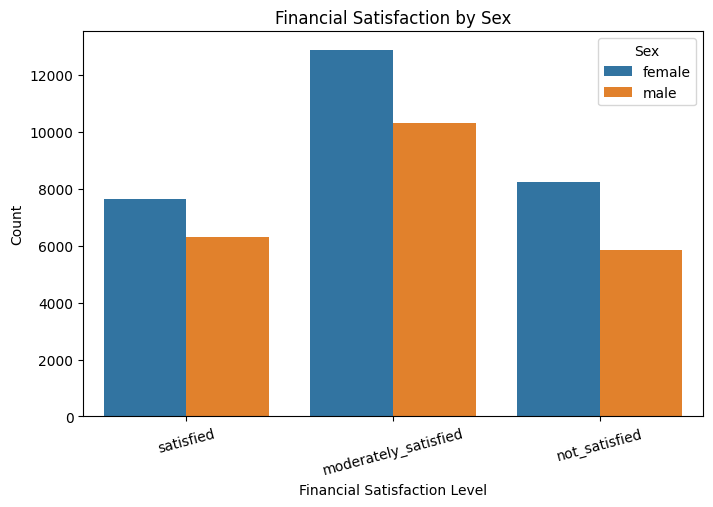

In [25]:
# 3. Financial Satisfaction by Sex
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='satfin', hue='sex', order=['satisfied', 'moderately_satisfied', 'not_satisfied'])
plt.title("Financial Satisfaction by Sex")
plt.xlabel("Financial Satisfaction Level")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(title="Sex", bbox_to_anchor=(1,1))
plt.show()

To explore the dataset, I created three visualizations that highlight key patterns in occupational prestige, job satisfaction, and financial well-being.

First, I generated a histogram to examine the distribution of occupational prestige scores. The histogram displays the frequency of different prestige levels among respondents, providing insight into whether most individuals hold high-prestige or low-prestige jobs. Additionally, I included a kernel density estimate (KDE) curve to visualize the overall shape of the distribution, making it easier to identify patterns such as skewness or clustering.

This histogram shows that most occupational prestige scores are concentrated around a narrow range, with a sharp peak around 35-40. The Kernel Density Estimate (KDE) curve highlights a high concentration of respondents within this range, suggesting that a majority of occupations are perceived similarly in terms of prestige. The distribution appears slightly skewed, with fewer occupations classified as either extremely high or low in prestige.

Next, I created a bar chart that compares job satisfaction levels across different work statuses. Using a count plot, this visualization shows the number of respondents in each job satisfaction category (very satisfied, moderately satisfied, slightly dissatisfied, very dissatisfied), grouped by their employment status (full-time, part-time, student, retired, homemaker, unemployed). This plot allows us to see how different work statuses influence job satisfaction and whether certain groups report higher dissatisfaction levels.

This bar chart compares job satisfaction levels across different employment statuses. It shows that full-time workers report the highest levels of job satisfaction, with the majority in the "very satisfied" or "moderately satisfied" categories. Homemakers and retired individuals also report relatively high satisfaction, while unemployed and part-time workers are more likely to express dissatisfaction. This suggests that employment stability may play a role in overall job satisfaction.

Finally, I plotted a bar chart comparing financial satisfaction across gender groups. This visualization examines whether financial satisfaction levels (satisfied, moderately satisfied, not satisfied) vary between men and women. By grouping responses by sex, this plot provides insight into potential gender disparities in financial well-being and helps assess whether men and women experience different levels of financial security.

This chart compares financial satisfaction levels between males and females. The trend suggests that women report slightly higher financial satisfaction in the "satisfied" and "moderately satisfied" categories, whereas men report slightly higher dissatisfaction. This could reflect gender differences in financial expectations, economic security, or income levels.


**Conclusion**

This analysis explored key aspects of occupational prestige, job satisfaction, and financial well-being using data from the General Social Survey (GSS). Through data cleaning, summary statistics, and visualizations, we identified important patterns in work and financial perceptions across different demographic groups.

The distribution of occupational prestige scores revealed that most occupations fall within a narrow prestige range, with fewer jobs classified at extreme levels. Job satisfaction varied by work status, with full-time workers and retirees reporting higher satisfaction compared to unemployed and part-time workers. Financial satisfaction also differed by gender, with women slightly more likely to report satisfaction compared to men.

These findings provide valuable insights into how employment status, prestige, and demographics influence job and financial satisfaction.